In [1]:
'''
This module processes a dictionary already in the shape of a panda
dataframe in order to perform natural language processing.
'''

'\nThis module processes a dictionary already in the shape of a panda\ndataframe in order to perform natural language processing.\n'

In [2]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

In [84]:

from collections import defaultdict
import os
import pandas as pd

import json

# Regular Expression library
import re

from wordcloud import WordCloud
from PIL import Image

import nltk

import matplotlib.pyplot as mplt

from googletrans import Translator

from tabulate import tabulate

In [5]:
directory_save = os.path.join('D:', 'tese_data', 'save')
print(directory_save)

D:tese_data\save


In [6]:
# Open the file

file_path = os.path.join(directory_save, 'clean_dataframe.json')

speeches = pd.read_json(file_path, orient="records", lines=True)

In [7]:
# Some information on the dimension of the panda dataframe.

speeches.shape
print('There are {} columns and {} rows.'.format(speeches.shape[1], speeches.shape[0]))

There are 6 columns and 221036 rows.


In [94]:
# Take a look at all "naive" political party names we have

party_names = list(speeches.Party.unique())
print(party_names)

clean_parties = ['BE', 'PSD+CDS-PP', 'Os Verdes', 'PCP', 'PS']

['BE', 'PSD+CDS-PP', 'PS', 'Os Verdes', 'PCP']


In [9]:
# Take a look at the number of interventions by " naive" political party.

speeches.groupby('Party').agg({'count'})

,Date,File,Intervention,Session,Intervention_processed
,count,count,count,count,count
Party,,,,,
BE,23680,23680,23680,23680,23680
Os Verdes,7937,7937,7937,7937,7937
PCP,37912,37912,37912,37912,37912
PS,60607,60607,60607,60607,60607
PSD+CDS-PP,90900,90900,90900,90900,90900


In [10]:
# Print the first interventions as example

speeches.head()

,Date,File,Intervention,Party,Session,Intervention_processed
0,2005-03-11,darl10sl01n001,"Sr. Presidente, o Bloco de Esquerda far-se-á r...",BE,10,sr presidente o bloco de esquerda far-se-á rep...
1,2005-03-11,darl10sl01n001,"Sr. Presidente, Srs. Deputados: Conheço José S...",BE,10,sr presidente srs deputados conheço josé sarai...
2,2005-03-11,darl10sl01n001,"Sr. Presidente, Sr.as Deputadas e Srs. Deputad...",BE,10,sr presidente sras deputadas e srs deputados c...
3,2005-03-11,darl10sl01n001,"Sr. Presidente, é para indicar que integrará e...",PSD+CDS-PP,10,sr presidente é para indicar que integrará ess...
4,2005-03-11,darl10sl01n001,"Sr. Presidente, Sr.as e Srs. Deputados: No pas...",PSD+CDS-PP,10,sr presidente sras e srs deputados no passado ...


In [11]:
# Some information on the dimension of the panda dataframe.

speeches.shape
print('There are {} columns and {} rows.'.format(speeches.shape[1], speeches.shape[0]))

There are 6 columns and 221036 rows.


In [12]:
# Some information on the different data types of the dataframe.

speeches.dtypes

Date                      datetime64[ns]
File                              object
Intervention                      object
Party                             object
Session                            int64
Intervention_processed            object
dtype: object

In [13]:
# Distribution of intervention per year

speeches.groupby([speeches['Date'].dt.year]).agg({'count'})
# speeches.groupby([speeches['Date'].dt.year, speeches['Date'].dt.month]).agg({'count'})

,Date,File,Intervention,Party,Session,Intervention_processed
,count,count,count,count,count,count
Date,,,,,,
2005,11196,11196,11196,11196,11196,11196
2006,17501,17501,17501,17501,17501,17501
2007,19399,19399,19399,19399,19399,19399
2008,19234,19234,19234,19234,19234,19234
2009,13974,13974,13974,13974,13974,13974
2010,15537,15537,15537,15537,15537,15537
2011,14202,14202,14202,14202,14202,14202
2012,19141,19141,19141,19141,19141,19141


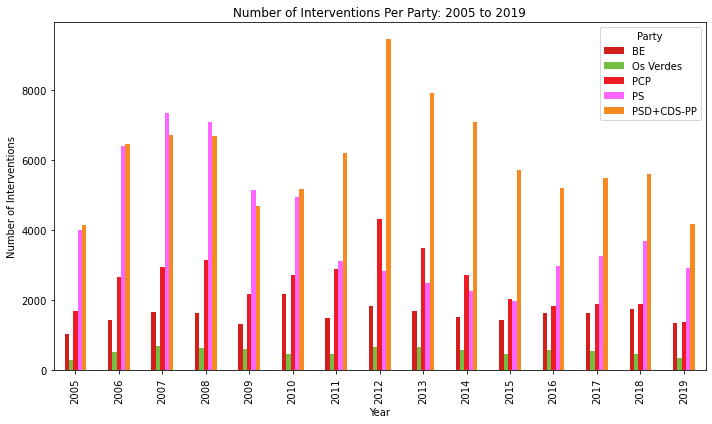

In [14]:
# Graph of number of interventions by year and political party.

party_colors_rgb = {
    'BE': '#D21F1B',
    'Os Verdes': '#73BE43',
    'PAN': '#036A84',
    'PCP': '#EC1B24',
    'PS': '#FF66FF',
    'PSD+CDS-PP': '#F68A21',
    'N insc.': '#000000'
}



# Group interventions by year and party, and count the number of interventions per group
interventions_per_party_per_year = speeches.groupby([speeches['Date'].dt.year, 'Party']).size().unstack()

# Create a bar plot
mplt.figure(figsize=(10, 6))  # Optional: Set the figure size
interventions_per_party_per_year.plot(kind='bar', ax=mplt.gca(), color=[party_colors_rgb.get(p, '#999999') for p in interventions_per_party_per_year.columns])
mplt.xlabel('Year')
mplt.ylabel('Number of Interventions')
mplt.title('Number of Interventions Per Party: 2005 to 2019')
mplt.tight_layout()

# Show the plot
mplt.show()

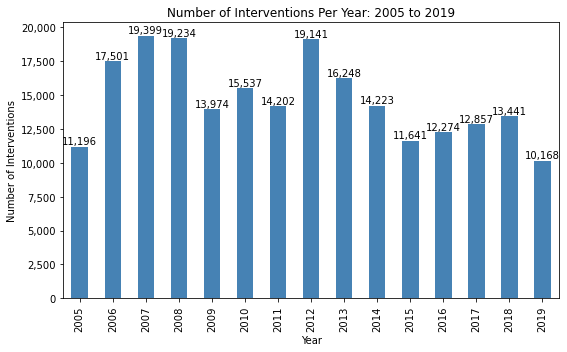

In [112]:
import matplotlib.ticker as mticker

# Group interventions by year and count the number of interventions per year
interventions_per_year = speeches['Date'].dt.year.value_counts().sort_index()

# Create a bar plot
mplt.figure(figsize=(8, 5))  # Optional: Set the figure size
ax = interventions_per_year.plot(kind='bar', ax=mplt.gca(), color='steelblue')
mplt.xlabel('Year')
mplt.ylabel('Number of Interventions')
mplt.title('Number of Interventions Per Year: 2005 to 2019')

# Add total number with thousands separator on top of each bar
for p in ax.patches:
    ax.annotate('{:,}'.format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Add thousands separator to y-axis ticks
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

mplt.tight_layout()

# Show the plot
mplt.show()


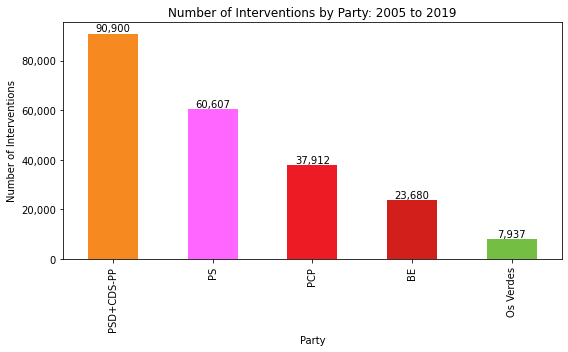

In [113]:
import matplotlib.ticker as mticker

# Graph of the number of intervention by party.
party_counts = speeches['Party'].value_counts()

mplt.figure(figsize=(8, 5))  # Optional: Set the figure size
ax = speeches.Party.value_counts(normalize=False).plot(kind='bar', color=[party_colors_rgb.get(p, '#999999') for p in party_counts.index])
mplt.title('Number of Interventions by Party: 2005 to 2019')
mplt.ylabel('Number of Interventions')

# Add thousands separator to y-axis ticks
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate('{:,}'.format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

mplt.tight_layout()

# Show the plot
mplt.show()


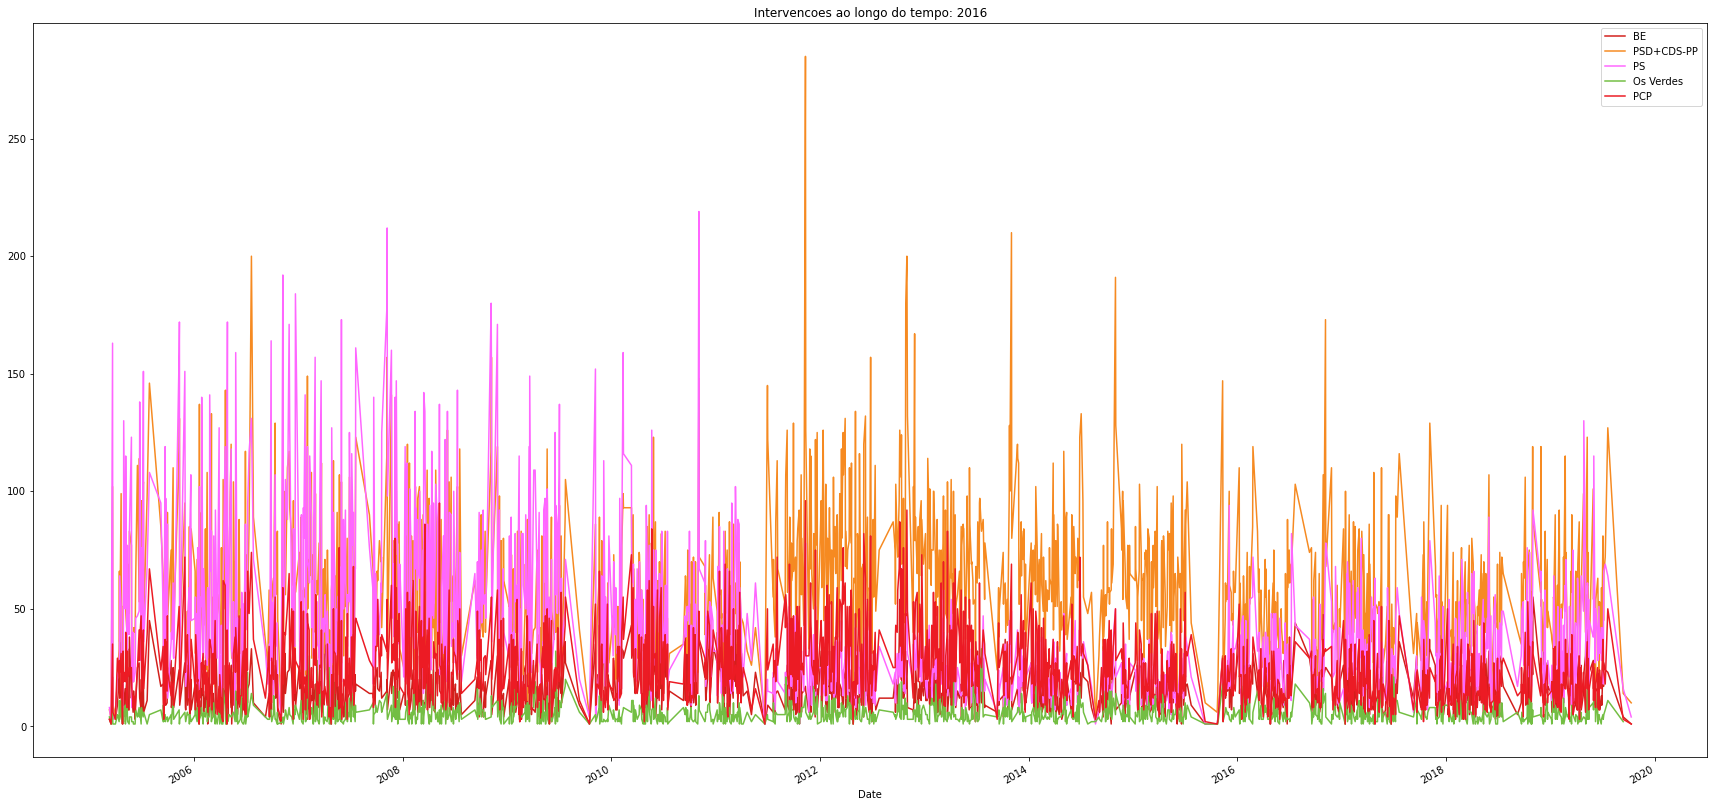

In [16]:
# Graph of the number of intervention by party across time. 


mplt.figure(figsize=(30, 15))
mplt.title('Interventions across time: 2016')
for index, party in enumerate(party_names):
    speeches[(speeches.Party == party)].groupby(speeches.Date) \
                    .Intervention.count().plot(label = party, \
                        color = party_colors_rgb[party])
    
mplt.legend()

In [17]:
# Below, I load the lists of words so I can do word clouds and most common words

In [23]:
def load(party = "all"):
    '''Loads the relevant data_words file.'''

    directory_save_panda = os.path.join('D:', 'tese_data', 'save', 'panda')

    if party == "all":
        st = 'data_words.json'
    
    elif party in clean_parties:
        st = 'data_words_' + party + '.json'

    file_path = os.path.join(directory_save_panda, st)

    lst_words = []

    with open(file_path, 'r') as infile:
        lst_words = json.load(infile)
        
    return lst_words

In [19]:
'''
Here, I create a word cloud for interventions.
'''

def word_c(words_list):

    flat_list = [item for sublist in words_list for item in sublist]
    # Join the different processed interventions together.
    long_string = ','.join(flat_list)
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    mplt.imshow(wordcloud.generate(long_string))
    mplt.axis("off") 
    mplt.show()
    # Display the word cloud



In [91]:
def most_common_words(words_list, size_of_list):
    """
    Returns a list of the most commonly used words in a list of tokens.
    """
    flat_list = [item for sublist in words_list for item in sublist]
    fd = nltk.FreqDist(flat_list)

    total_words = len(flat_list)

    word_count_dict = {}

    for word in fd.most_common(size_of_list):
        count = word[1]
        relative_frequency = count / total_words
        formatted_relative_frequency = "{:.4f}".format(relative_frequency)
        print(word[0], count, formatted_relative_frequency)
        word_count_dict[word[0]] = {
            'Count': count,
            'Relative Frequency': formatted_relative_frequency
        }

    return word_count_dict

def create_word_count_table(word_count_dict):
    """
    Creates a prettier table with word translations, counts, and relative frequencies.
    """
    # Initialize the translator
    translator = Translator()

    # Create lists to store data for each column
    data = []

    # Iterate through the word count dictionary
    for word in word_count_dict:
        # Translate the word to English
        translation = translator.translate(word, src='pt', dest='en').text

        # Format the count with dot separator for thousands
        formatted_count = "{:,}".format(word_count_dict[word]['Count'])
        formatted_relative_frequency = word_count_dict[word]['Relative Frequency']

        # Append data to the list
        data.append([word, translation, formatted_count, formatted_relative_frequency])

    # Create a prettier table using tabulate
    headers = ['Word', 'Translation', 'Count', 'Relative Frequency']
    table = tabulate(data, headers=headers, tablefmt='pretty')

    return table

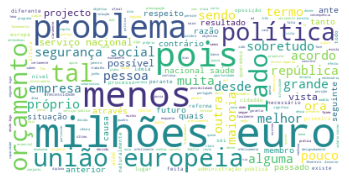


social 49338 0.0040
política 42343 0.0034
nacional 39066 0.0032
trabalho 37508 0.0030
saúde 36673 0.0030
empresas 29223 0.0024
orçamento 28464 0.0023
pessoas 27636 0.0022
pública 27332 0.0022
trabalhadores 27266 0.0022


{'social': {'Count': 49338, 'Relative Frequency': '0.0040'},
 'política': {'Count': 42343, 'Relative Frequency': '0.0034'},
 'nacional': {'Count': 39066, 'Relative Frequency': '0.0032'},
 'trabalho': {'Count': 37508, 'Relative Frequency': '0.0030'},
 'saúde': {'Count': 36673, 'Relative Frequency': '0.0030'},
 'empresas': {'Count': 29223, 'Relative Frequency': '0.0024'},
 'orçamento': {'Count': 28464, 'Relative Frequency': '0.0023'},
 'pessoas': {'Count': 27636, 'Relative Frequency': '0.0022'},
 'pública': {'Count': 27332, 'Relative Frequency': '0.0022'},
 'trabalhadores': {'Count': 27266, 'Relative Frequency': '0.0022'}}

In [118]:
# All together

a = load()
word_c(a)
print()
most_common_words(a,10)

This is the data for party:  BE
/////////////////////////////////



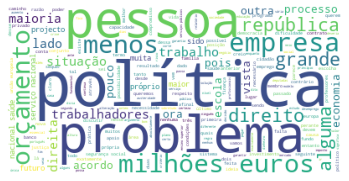


social 6700
política 6642
trabalho 6229
pessoas 5304
saúde 5197
nacional 4467
trabalhadores 4266
milhões 3931
pública 3921
público 3919



This is the data for party:  PSD+CDS-PP
/////////////////////////////////



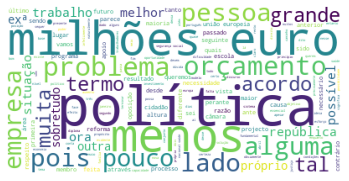


social 17209
nacional 12512
política 11851
saúde 11606
empresas 10900
trabalho 10715
orçamento 9957
economia 9676
situação 9277
milhões 9210



This is the data for party:  PS
/////////////////////////////////



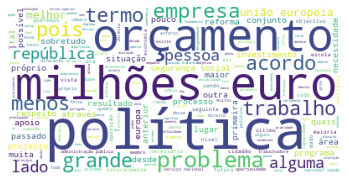


social 15736
política 12069
nacional 11698
trabalho 10321
saúde 9502
orçamento 9001
programa 8726
empresas 8712
segurança 8465
pública 8248



This is the data for party:  Os Verdes
/////////////////////////////////



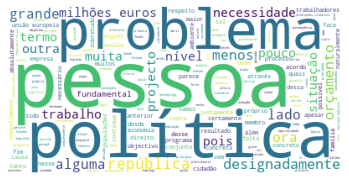


pessoas 2927
saúde 2828
república 2652
nacional 2167
trabalho 2114
social 2055
orçamento 1829
designadamente 1820
nível 1766
políticas 1676



This is the data for party:  PCP
/////////////////////////////////



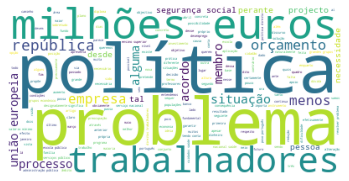


trabalhadores 11545
política 10036
trabalho 7953
nacional 7952
social 7463
saúde 7168
direitos 6102
situação 5569
pública 5418
república 5309





In [24]:
# By party

for part in party_names:
    
    temp = load(part)
    print("This is the data for party: ", part)
    print("/////////////////////////////////")
    print()
    
    word_c(temp)
    print()
    most_common_words(temp,10)
    
    
    print()
    print()
    print()

In [92]:
word_count_dict = most_common_words(a, 25)
table = create_word_count_table(word_count_dict)

# Display the table
print(table)

social 49338 0.0040
política 42343 0.0034
nacional 39066 0.0032
trabalho 37508 0.0030
saúde 36673 0.0030
empresas 29223 0.0024
orçamento 28464 0.0023
pessoas 27636 0.0022
pública 27332 0.0022
trabalhadores 27266 0.0022
milhões 26477 0.0021
situação 26346 0.0021
república 25576 0.0021
segurança 24589 0.0020
problema 24520 0.0020
economia 24114 0.0019
público 23640 0.0019
menos 22614 0.0018
programa 22086 0.0018
processo 21674 0.0017
sistema 21546 0.0017
serviço 21198 0.0017
euros 20878 0.0017
condições 20466 0.0017
comissão 20318 0.0016
+---------------+-------------+--------+--------------------+
|     Word      | Translation | Count  | Relative Frequency |
+---------------+-------------+--------+--------------------+
|    social     |   Social    | 49,338 |       0.0040       |
|   política    |   policy    | 42,343 |       0.0034       |
|   nacional    |  national   | 39,066 |       0.0032       |
|   trabalho    |    work     | 37,508 |       0.0030       |
|     saúde     |   heal

In [93]:
# Word counts by By party

for part in clean_parties:
    
    temp = load(part)
    print("This is the data for party: ", part)
    print("/////////////////////////////////")
    print()
    word_count_dict = most_common_words(temp, 15)
    table = create_word_count_table(word_count_dict)
    print()
    print(table)
    
    
    print()
    print()
    print()

This is the data for party:  BE
/////////////////////////////////

social 6700 0.0042
política 6642 0.0042
trabalho 6229 0.0039
pessoas 5304 0.0034
saúde 5197 0.0033
nacional 4467 0.0028
trabalhadores 4266 0.0027
milhões 3931 0.0025
pública 3921 0.0025
público 3919 0.0025
problema 3916 0.0025
serviço 3622 0.0023
república 3476 0.0022
orçamento 3416 0.0022
direitos 3398 0.0021

+---------------+-------------+-------+--------------------+
|     Word      | Translation | Count | Relative Frequency |
+---------------+-------------+-------+--------------------+
|    social     |   Social    | 6,700 |       0.0042       |
|   política    |   policy    | 6,642 |       0.0042       |
|   trabalho    |    work     | 6,229 |       0.0039       |
|    pessoas    |   people    | 5,304 |       0.0034       |
|     saúde     |   health    | 5,197 |       0.0033       |
|   nacional    |  national   | 4,467 |       0.0028       |
| trabalhadores |   workers   | 4,266 |       0.0027       |
|    milhõ

In [25]:
# Below, I include the necessary code to create bar charts of relative frequency of words in parties for given legislatures.

In [26]:
def get_session_date_range(session):
    if session == 10:
        return "2005-2009"
    elif session == 11:
        return "2009-2011"
    elif session == 12:
        return "2011-2015"
    elif session == 13:
        return "2015-2019"
    else:
        return "Unknown"

In [36]:
def plot_word_share_by_party_all(word, speeches):
    # Calculate total word counts per party
    party_total_word_counts = speeches.groupby('Party')['Intervention_processed'].apply(lambda x: ' '.join(x)).str.split().apply(len)
    
    # Filter interventions containing the specified word
    interventions_with_word = speeches[speeches['Intervention_processed'].str.contains(word)]
    
    # Group by party and count occurrences of the word
    party_word_counts = interventions_with_word['Party'].value_counts().sort_index()
    
    # Calculate share of the word in total words for each party
    party_word_share = party_word_counts / party_total_word_counts
    
    # Ensure all parties are included in the party_word_share Series
    party_word_share = party_word_share.reindex(party_names, fill_value=0)
    
    # Plot the bar chart with party colors
    mplt.figure(figsize=(10, 6))
    party_word_share.plot(kind='bar', color=[party_colors_rgb.get(party, 'gray') for party in party_word_share.index])
    mplt.title(f'Share of "{word}" by Party')
    mplt.xlabel('Party')
    mplt.ylabel('Share of Total Words')
    mplt.xticks(rotation=45, ha='right')
    mplt.tight_layout()
    mplt.show()

    
def plot_word_share_by_party_for_sessions(word, sessions, speeches):
    # Calculate total word counts per party
    party_total_word_counts = speeches.groupby('Party')['Intervention_processed'].apply(lambda x: ' '.join(x)).str.split().apply(len)

    # Create a grid of subplots with 2 rows and 2 columns
    fig, axes = mplt.subplots(nrows=2, ncols=2, figsize=(15, 8), gridspec_kw={'height_ratios': [0.5, 0.5]})

    # Iterate over sessions and create a subplot for each
    for i, session in enumerate(sessions):
        row = i // 2  # Determine row based on index
        col = i % 2   # Determine column based on index

        # Filter interventions for the current session
        session_speeches = speeches[speeches['Session'] == session]

        # Filter interventions containing the specified word
        interventions_with_word = session_speeches[session_speeches['Intervention_processed'].str.contains(word)]

        # Group by party and count occurrences of the word
        party_word_counts = interventions_with_word['Party'].value_counts().sort_index()

        # Calculate share of the word in total words for each party
        party_word_share = party_word_counts / party_total_word_counts

        # Ensure all parties are included in the party_word_share Series
        party_word_share = party_word_share.reindex(party_names, fill_value=0)

        # Calculate the count of the specific word for the current session
        word_count_for_session = count_word_in_session(word, speeches, session)

        # Plot the bar chart with party colors
        ax = axes[row, col]
        party_word_share.plot(kind='bar', color=[party_colors_rgb.get(party, 'gray') for party in party_word_share.index], ax=ax)
        ax.set_title(f'Share of "{word}" by Party (Session {session}, {get_session_date_range(session)}) | Total: {word_count_for_session}')
        ax.set_xlabel('Party')
        ax.set_ylabel('Share of Total Words')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    mplt.tight_layout()
    mplt.show()

    
def count_word_in_session(word, speeches, session=None):

    if session is None:
        session_speeches = speeches
        
    elif session is not None:
        
        session_speeches = speeches[speeches['Session'] == session]

    # Filter interventions containing the specified word
    interventions_with_word = session_speeches[session_speeches['Intervention_processed'].str.contains(word)]


    # Count occurrences of the word
    total_count = interventions_with_word.shape[0]
    
    return total_count
    
def plot_word_share_by_party(word, speeches, per_session=False):
    if per_session:
        sessions = sorted(speeches['Session'].unique())
        plot_word_share_by_party_for_sessions(word, sessions, speeches)
    else:
        plot_word_share_by_party_all(word, speeches)

Specific word is:  equilíbrio


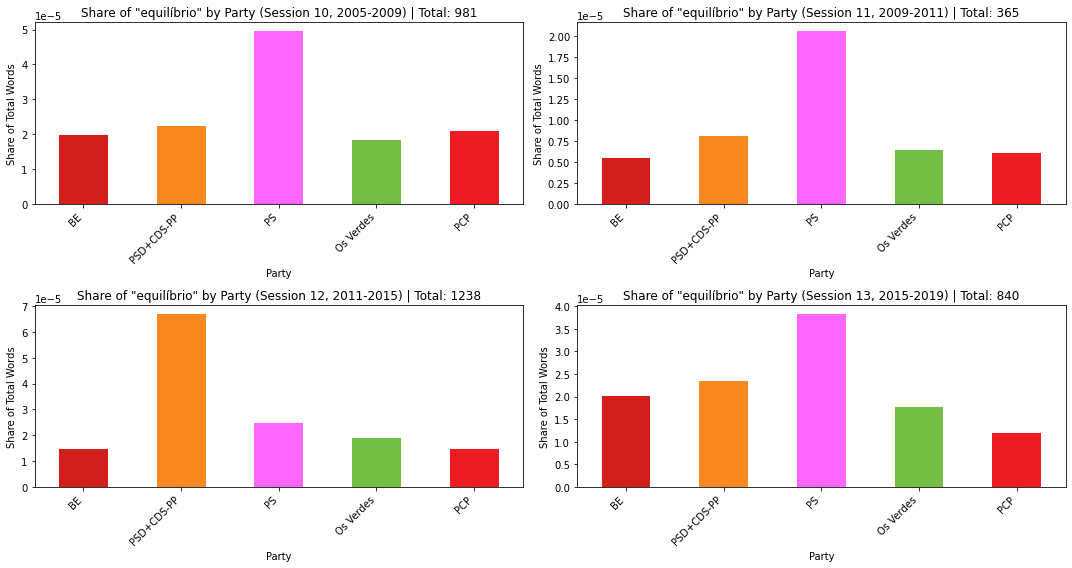


Specific word is:  orçamental


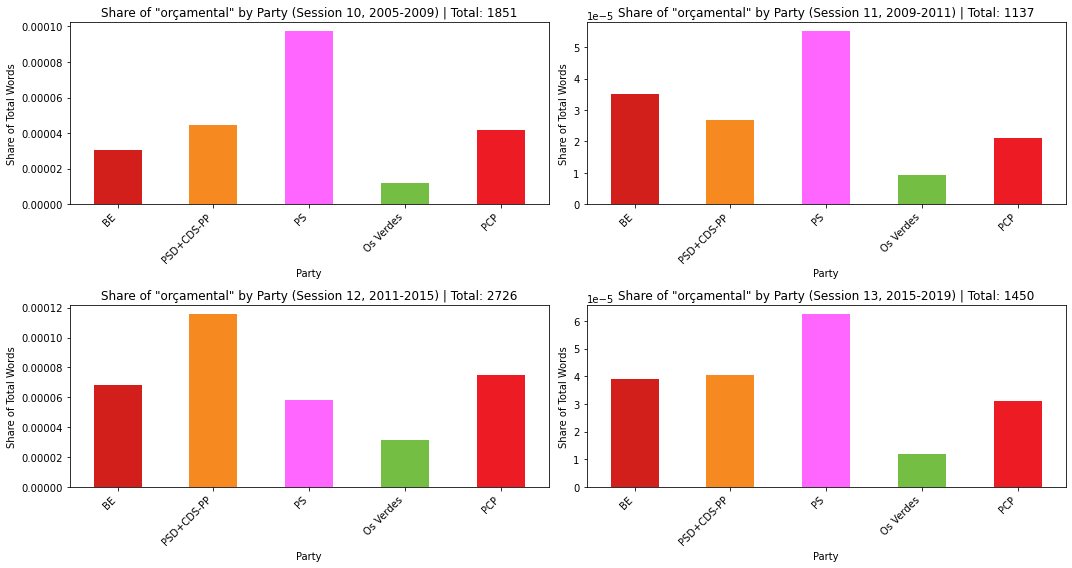


Specific word is:  consolidação


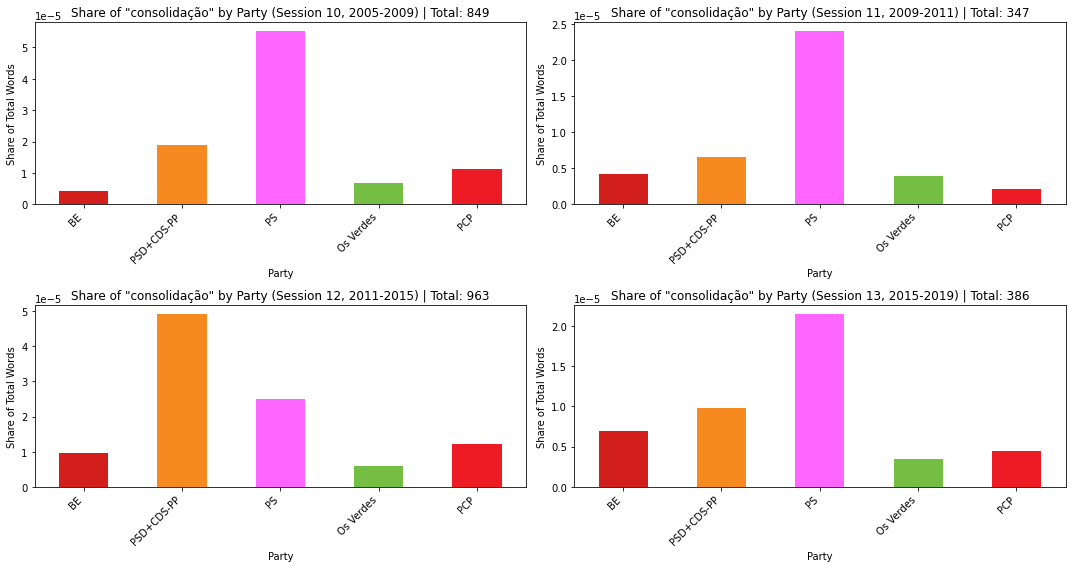


Specific word is:  dívida


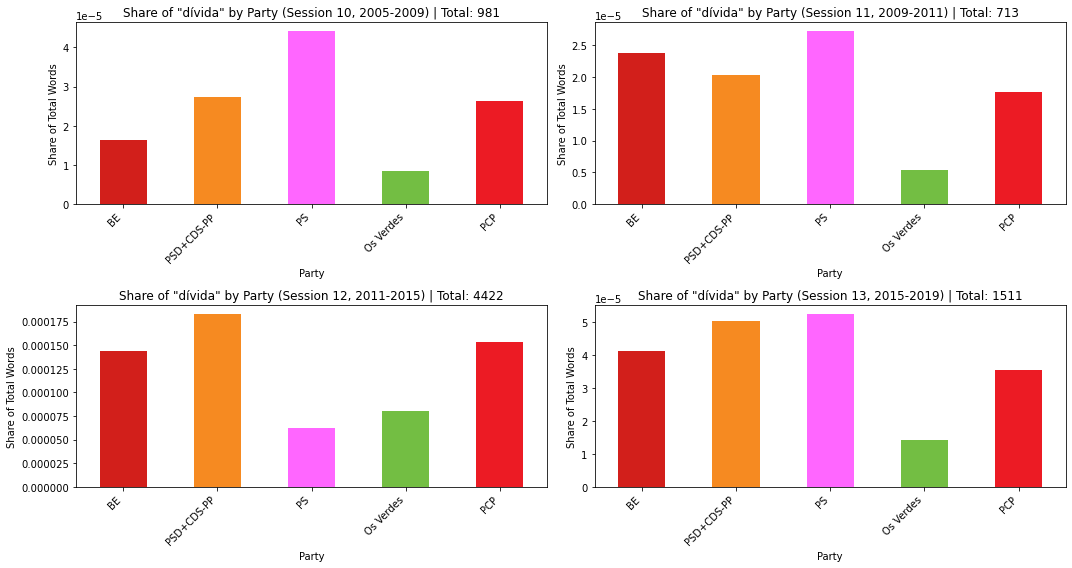


Specific word is:  soberana


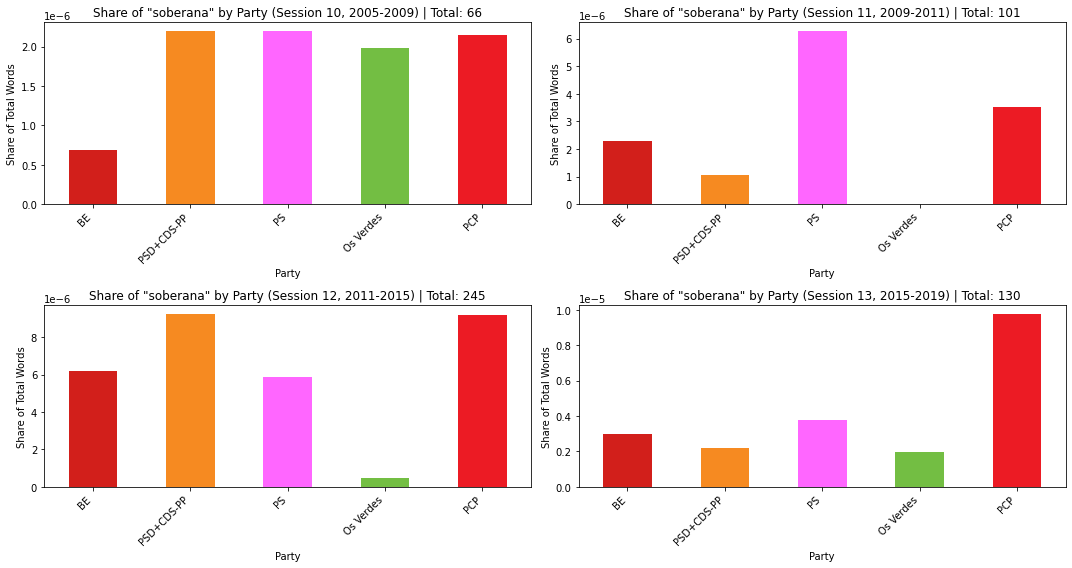


Specific word is:  contas


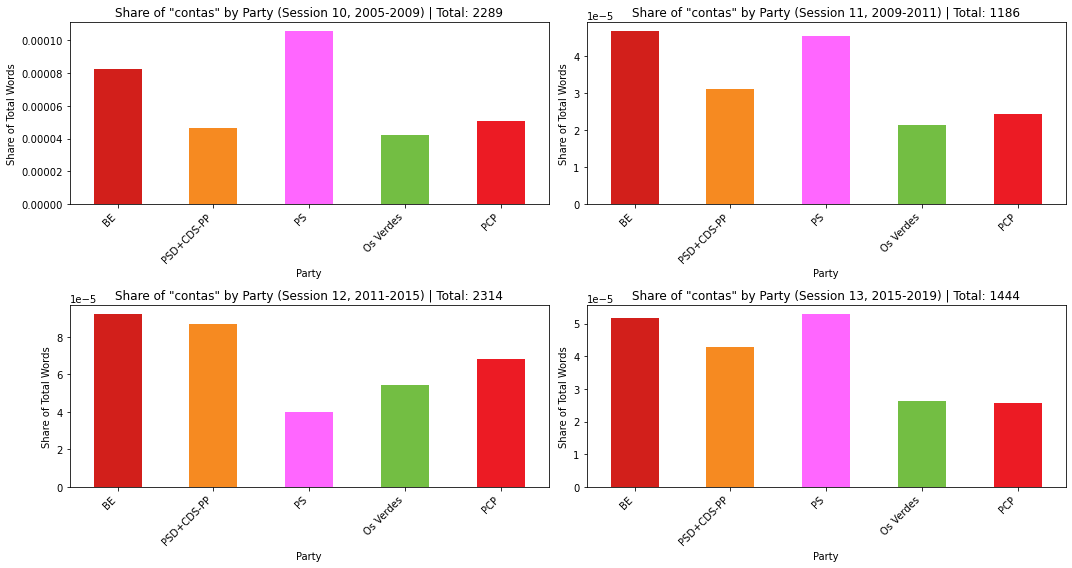


Specific word is:  deficit


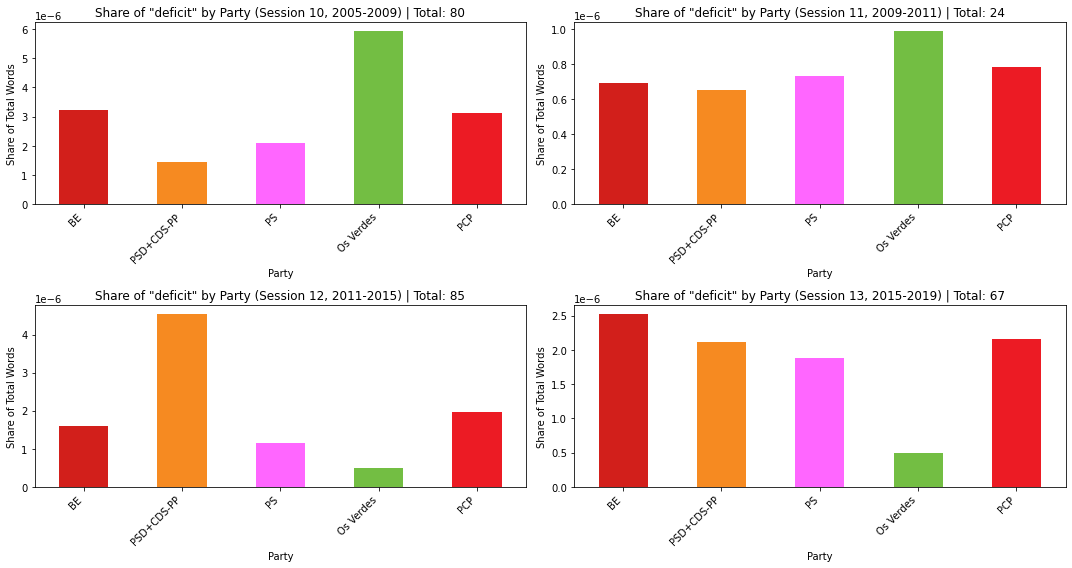


Specific word is:  grécia


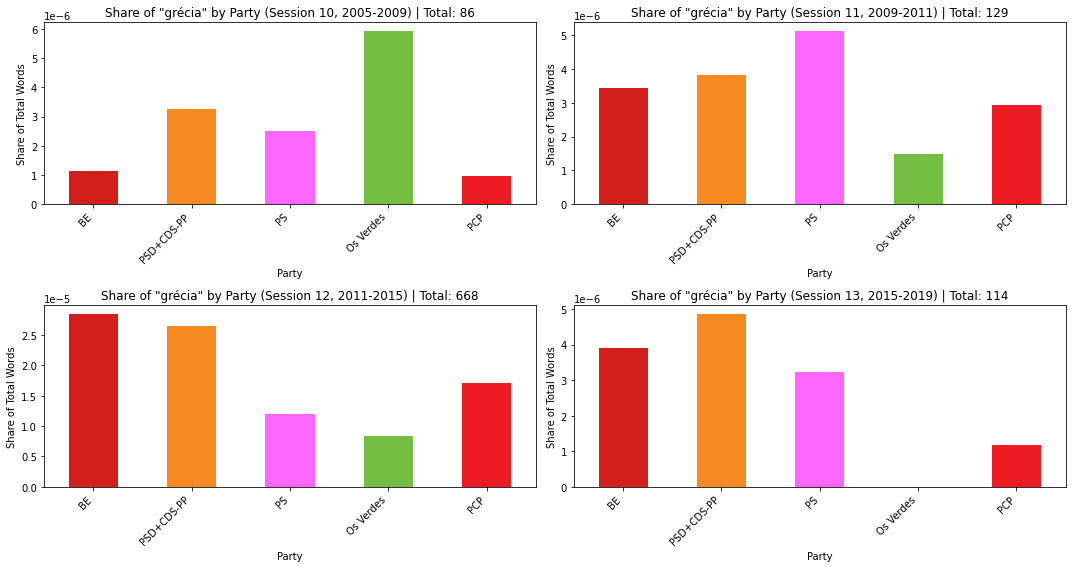


Specific word is:  maastricht


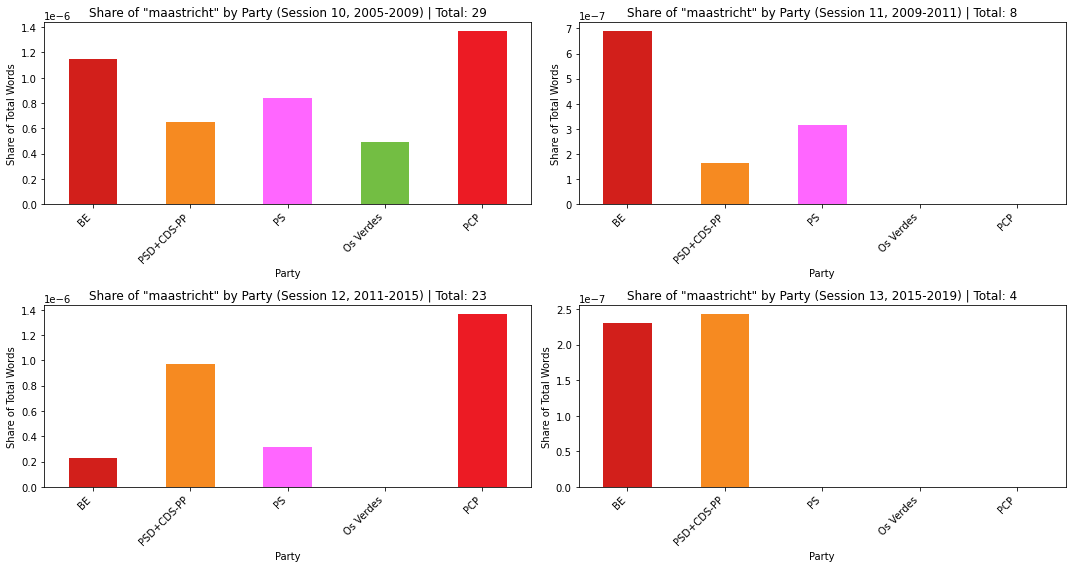


Specific word is:  pec


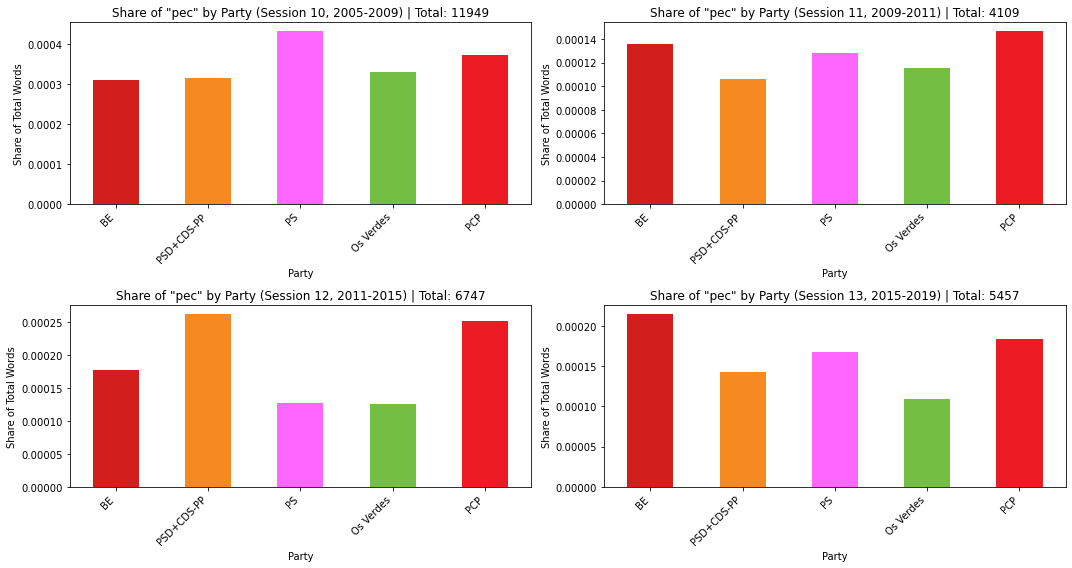


Specific word is:  troika


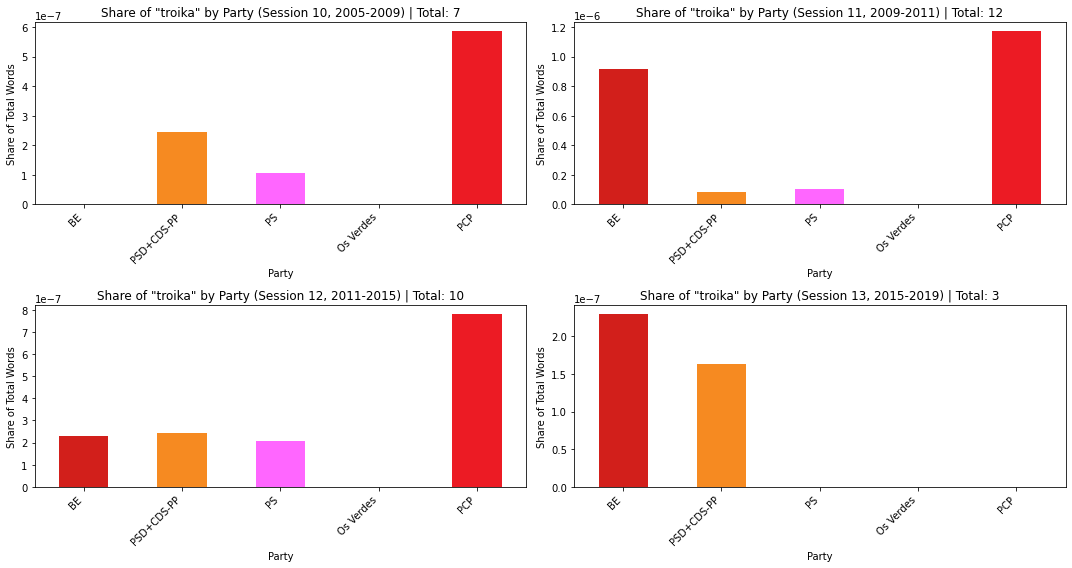


Specific word is:  fmi


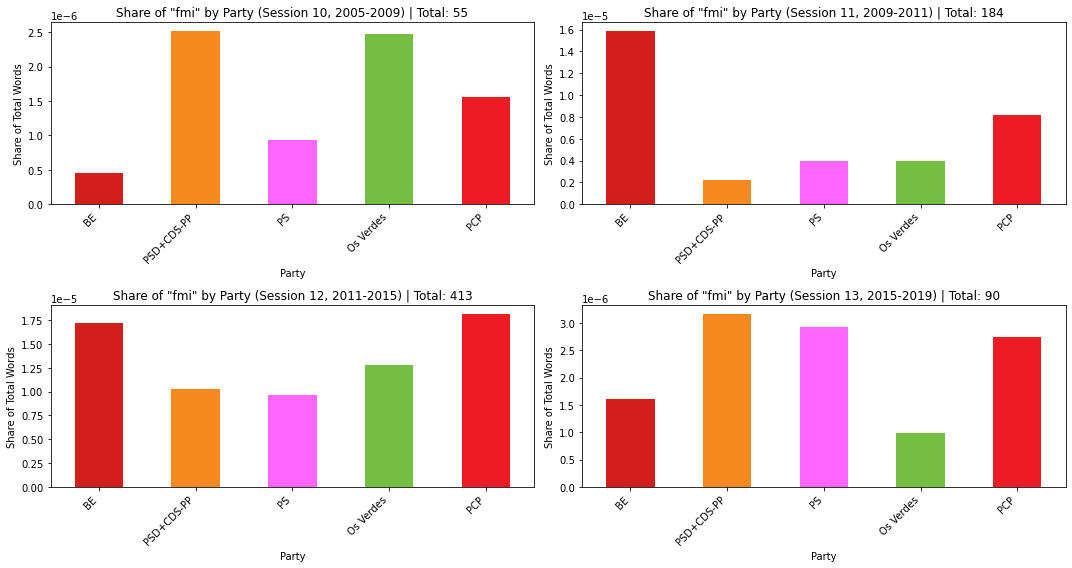


Specific word is:  memorando


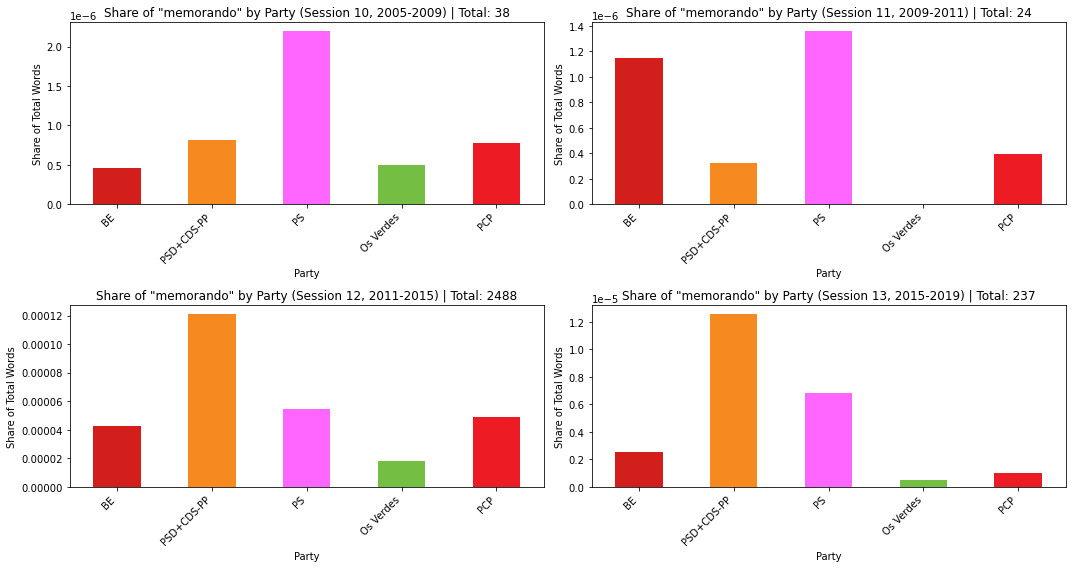


Specific word is:  ratings


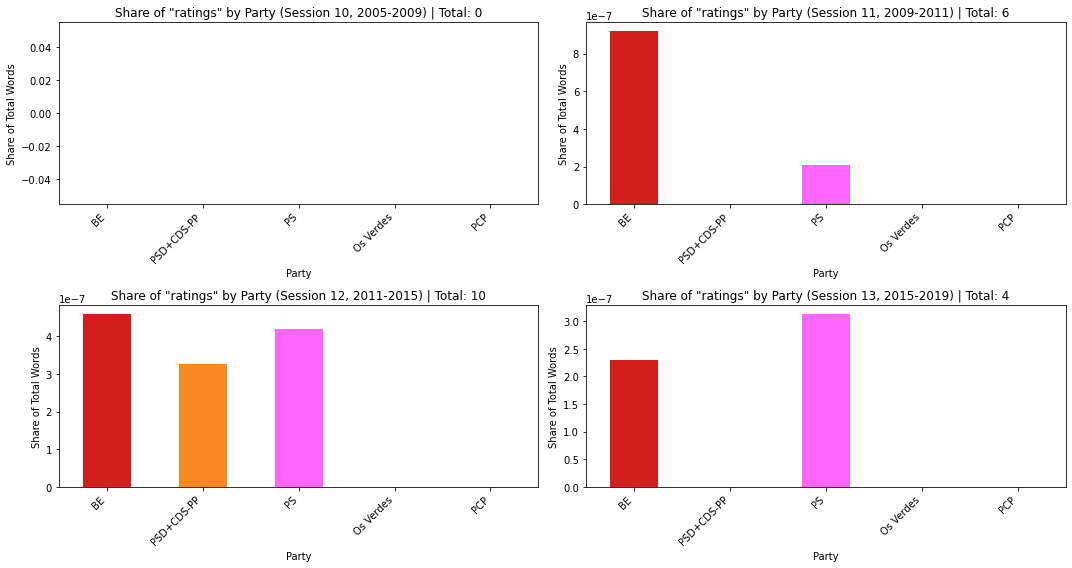


Specific word is:  fitch


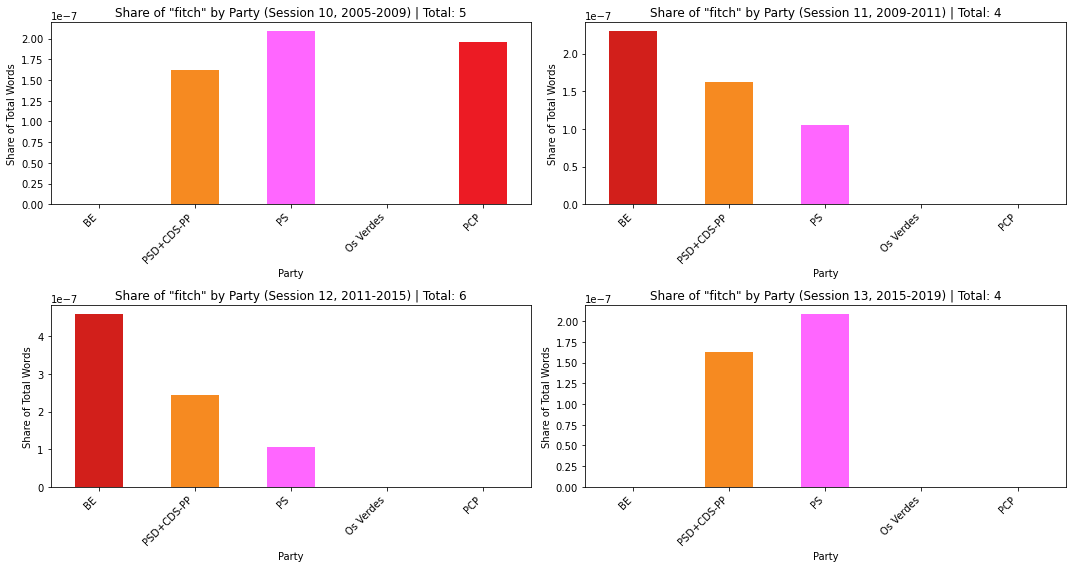


Specific word is:  credores


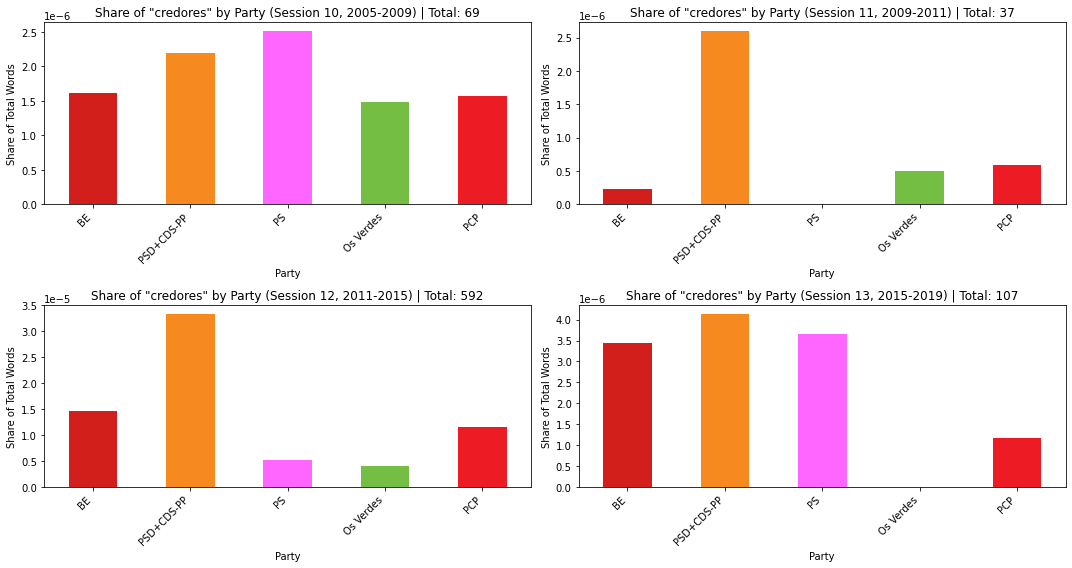


Specific word is:  spreads


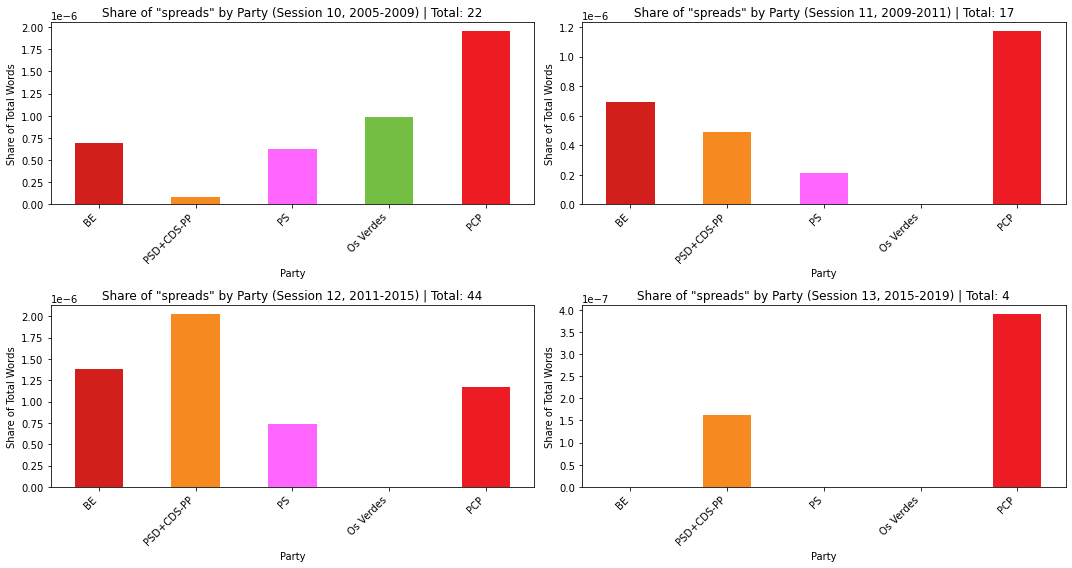


Specific word is:  saúde


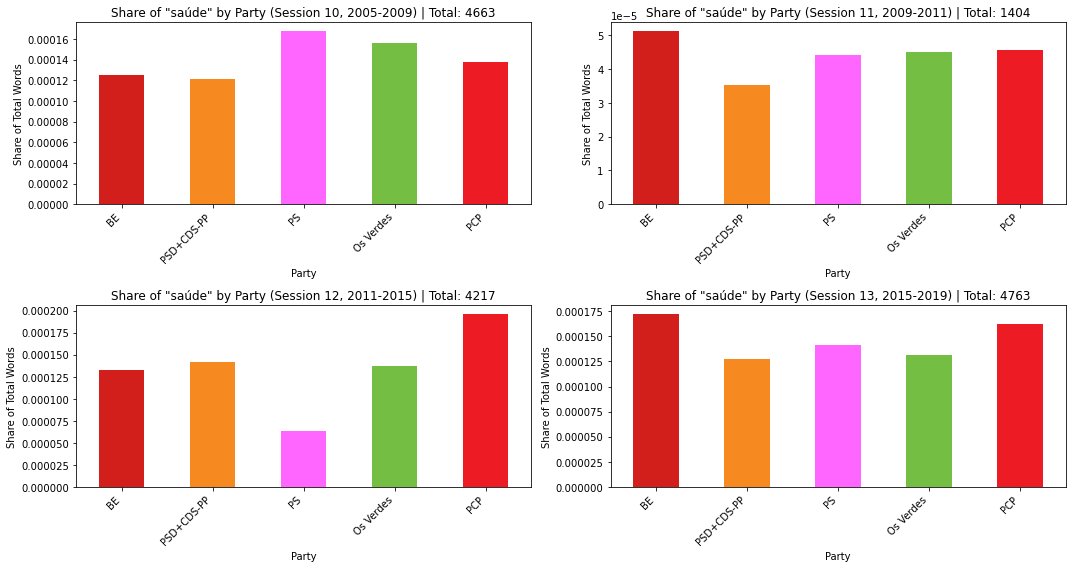


Specific word is:  hospitais


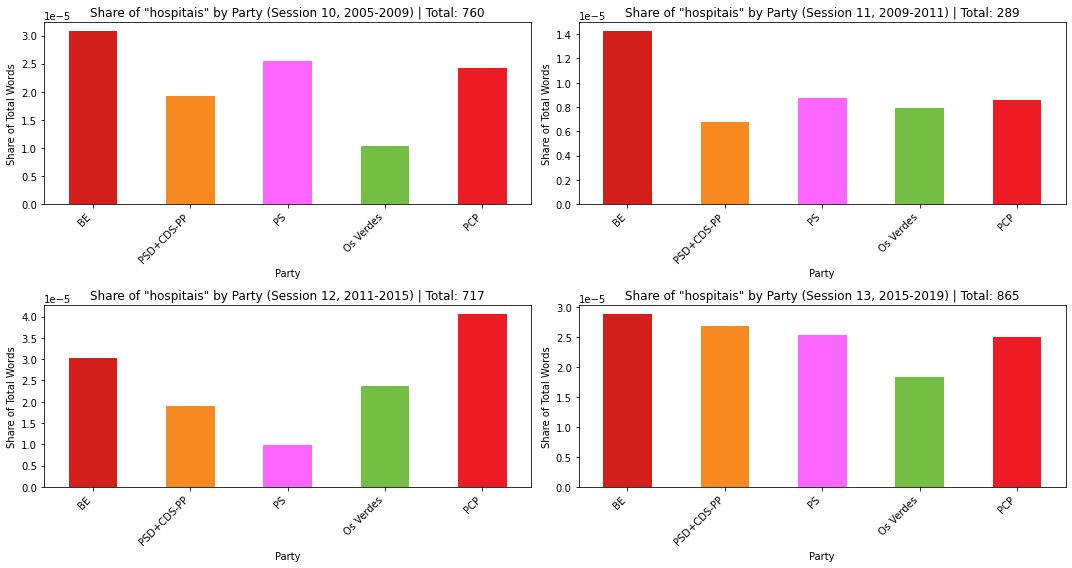


Specific word is:  escolas


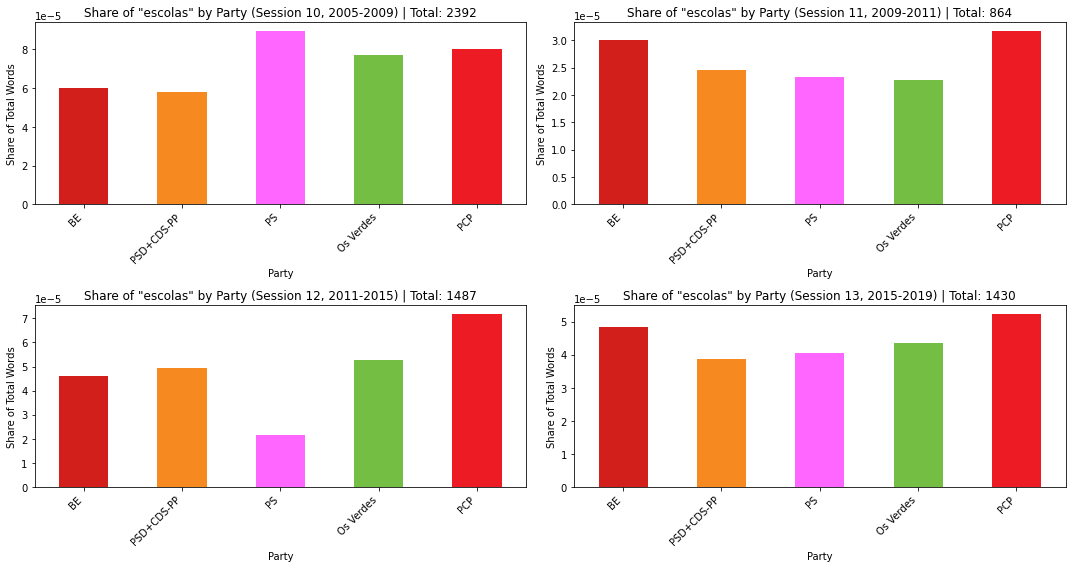


Specific word is:  professores


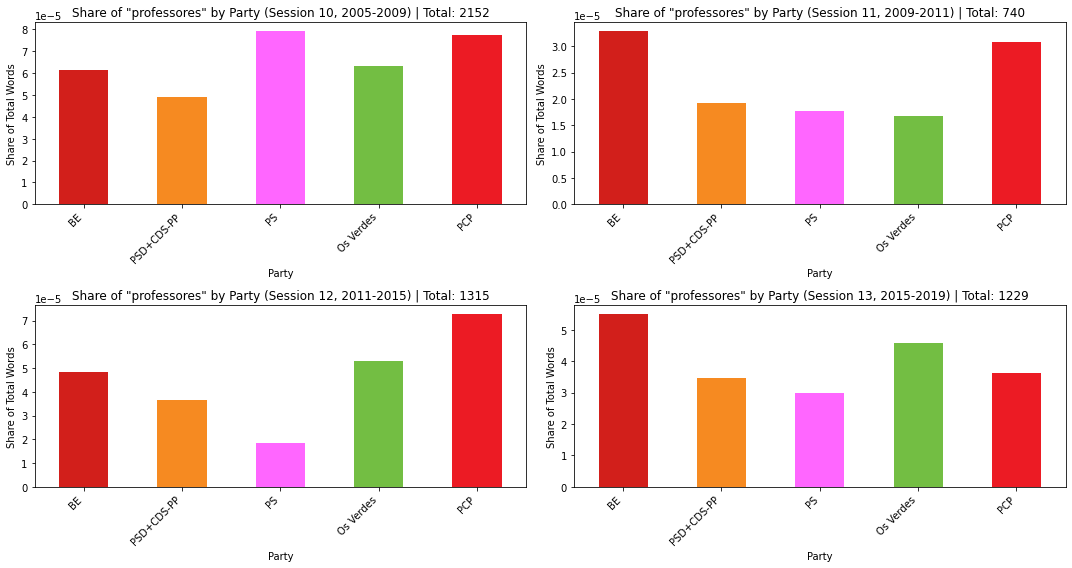


Specific word is:  investimento


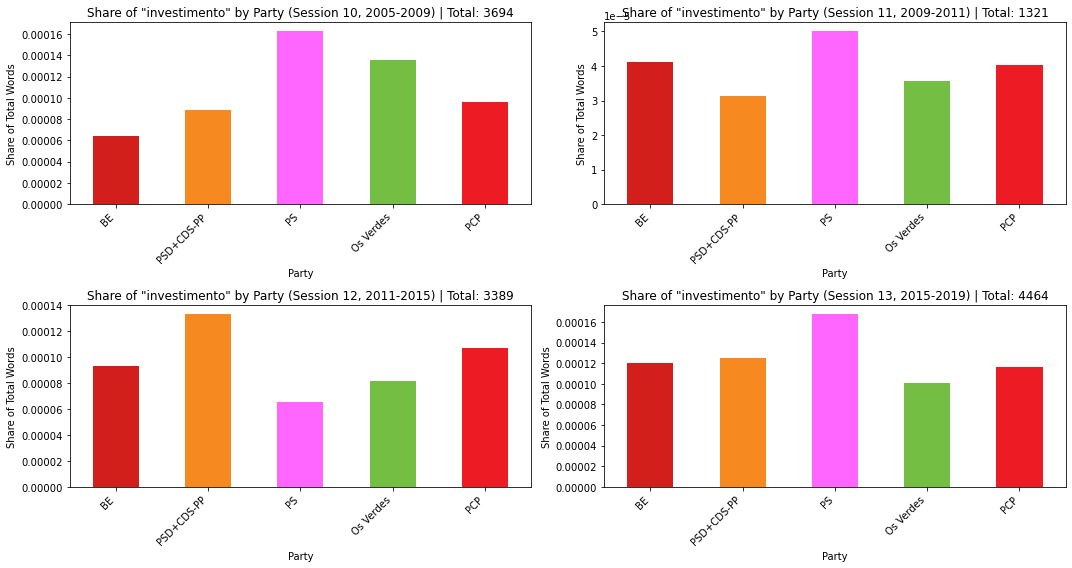


Specific word is:  público


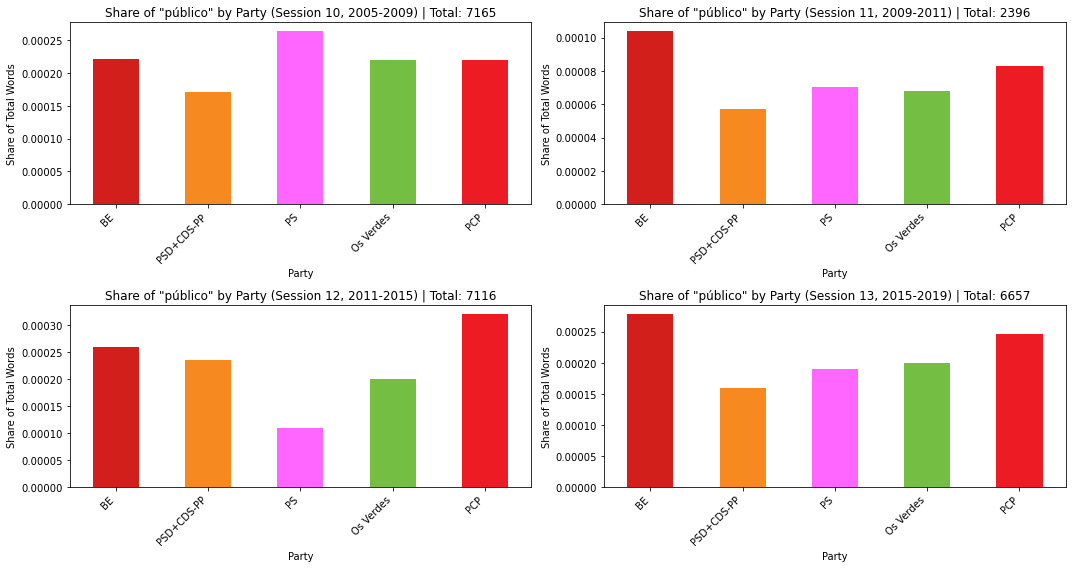


Specific word is:  desigualdades


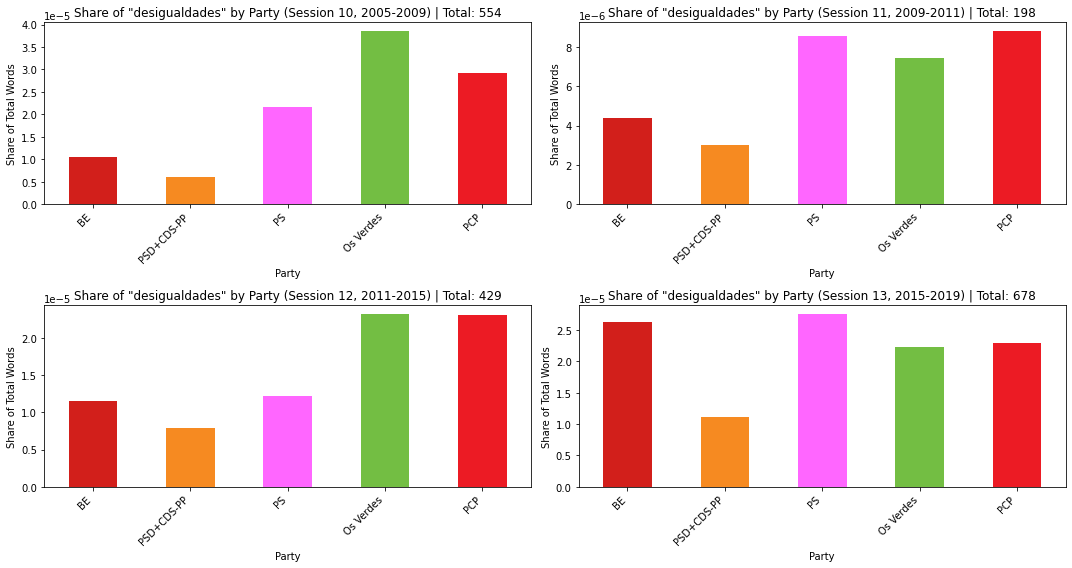

In [38]:
# Example usage

# Geral consolidaçao orçamental
specific_word = 'equilíbrio'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'orçamental'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'consolidação'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'dívida'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'soberana'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'contas'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'deficit'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'grécia'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'maastricht'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'pec'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()


# Troika, FMI, memorando

specific_word = 'troika'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'fmi'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'memorando'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()


# Ratings e credores
specific_word = 'ratings'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'fitch'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()


specific_word = 'credores'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'spreads'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()



# Other general examples:

specific_word = 'saúde'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'hospitais'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'escolas'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'professores'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'investimento'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'público'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

specific_word = 'desigualdades'
print("Specific word is: ", specific_word)
plot_word_share_by_party(specific_word, speeches, per_session=True)

print()

